# 응용통계학 과제
> 다중공선성

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics, 다중공선성]

In [52]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=4,repr.plot.res=500)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)


다중공선성이 존재하는 상황을 가정하고 

 

다중공선성을 어느 정도 제거한 모형 (M1)과 다중공선성이 내재되어 있는 모형 (M2) 을 고려하여

 

두 모형의 예측력을 모의실험을 통해 비교하여라,

 

단, 실험은 여러 번 반복하여 평균적인 결과를  report하되 설명변수의 개수는 3개 이상으로 설정하여라.

 

이미 존재하는 문서들을 참고하거나 재현해도 무방함.

 

(첨부된 문서 참고)

In [96]:
Nrep = 200

n = 1000

hatb1 <- hatb2 <- c()
te1 <- te2 <- c()

for (k in 1:Nrep)
{
x1 = runif(n,-3,3)
x2 = x1 + rnorm(n,0,0.01)
#X = model.matrix(~ x1 + x2)
#solve(t(X)%*%X)
y = 2 + x1 + 2*x2 + rnorm(n)

ind = sample(1:n,500)
tx1 = x1[ind]
tx2 = x2[ind]
test_x1 = x1[-ind]
test_x2 = x2[-ind]
ty  = y[ind]
test_y = y[-ind]

fit1 = lm(ty~tx1+tx2)
fit2 = lm(ty~tx1)

hatb1[k] = fit1$coefficients[2]
hatb2[k] = fit2$coefficients[2]

te1[k] = mean((test_y - predict(fit1,newdata=data.frame(test_x1,test_x2)))^2)
te2[k] = mean((test_y - predict(fit2,newdata=data.frame(test_x1)))^2)
#summary(lm(y~x1+x2))
#print(k)
}

c(mean(te1),mean(te2))
c(mean((hatb1-1)^2),mean((hatb2-2)^2))

[1] 54.53757 54.53442

[1] 21.6770604  0.9990726

---

## 시도 1

In [87]:
x1=runif(100)
x2 = 3*x1^2
x3 = 4*x1^3
y1=3+3.5*x1+rnorm(100)
y2=3+1.5*x1+x2^2+x3^3+rnorm(100)

In [88]:
cor(x1,x2)
cor(x1,x3)

[1] 0.9721531

[1] 0.9266461

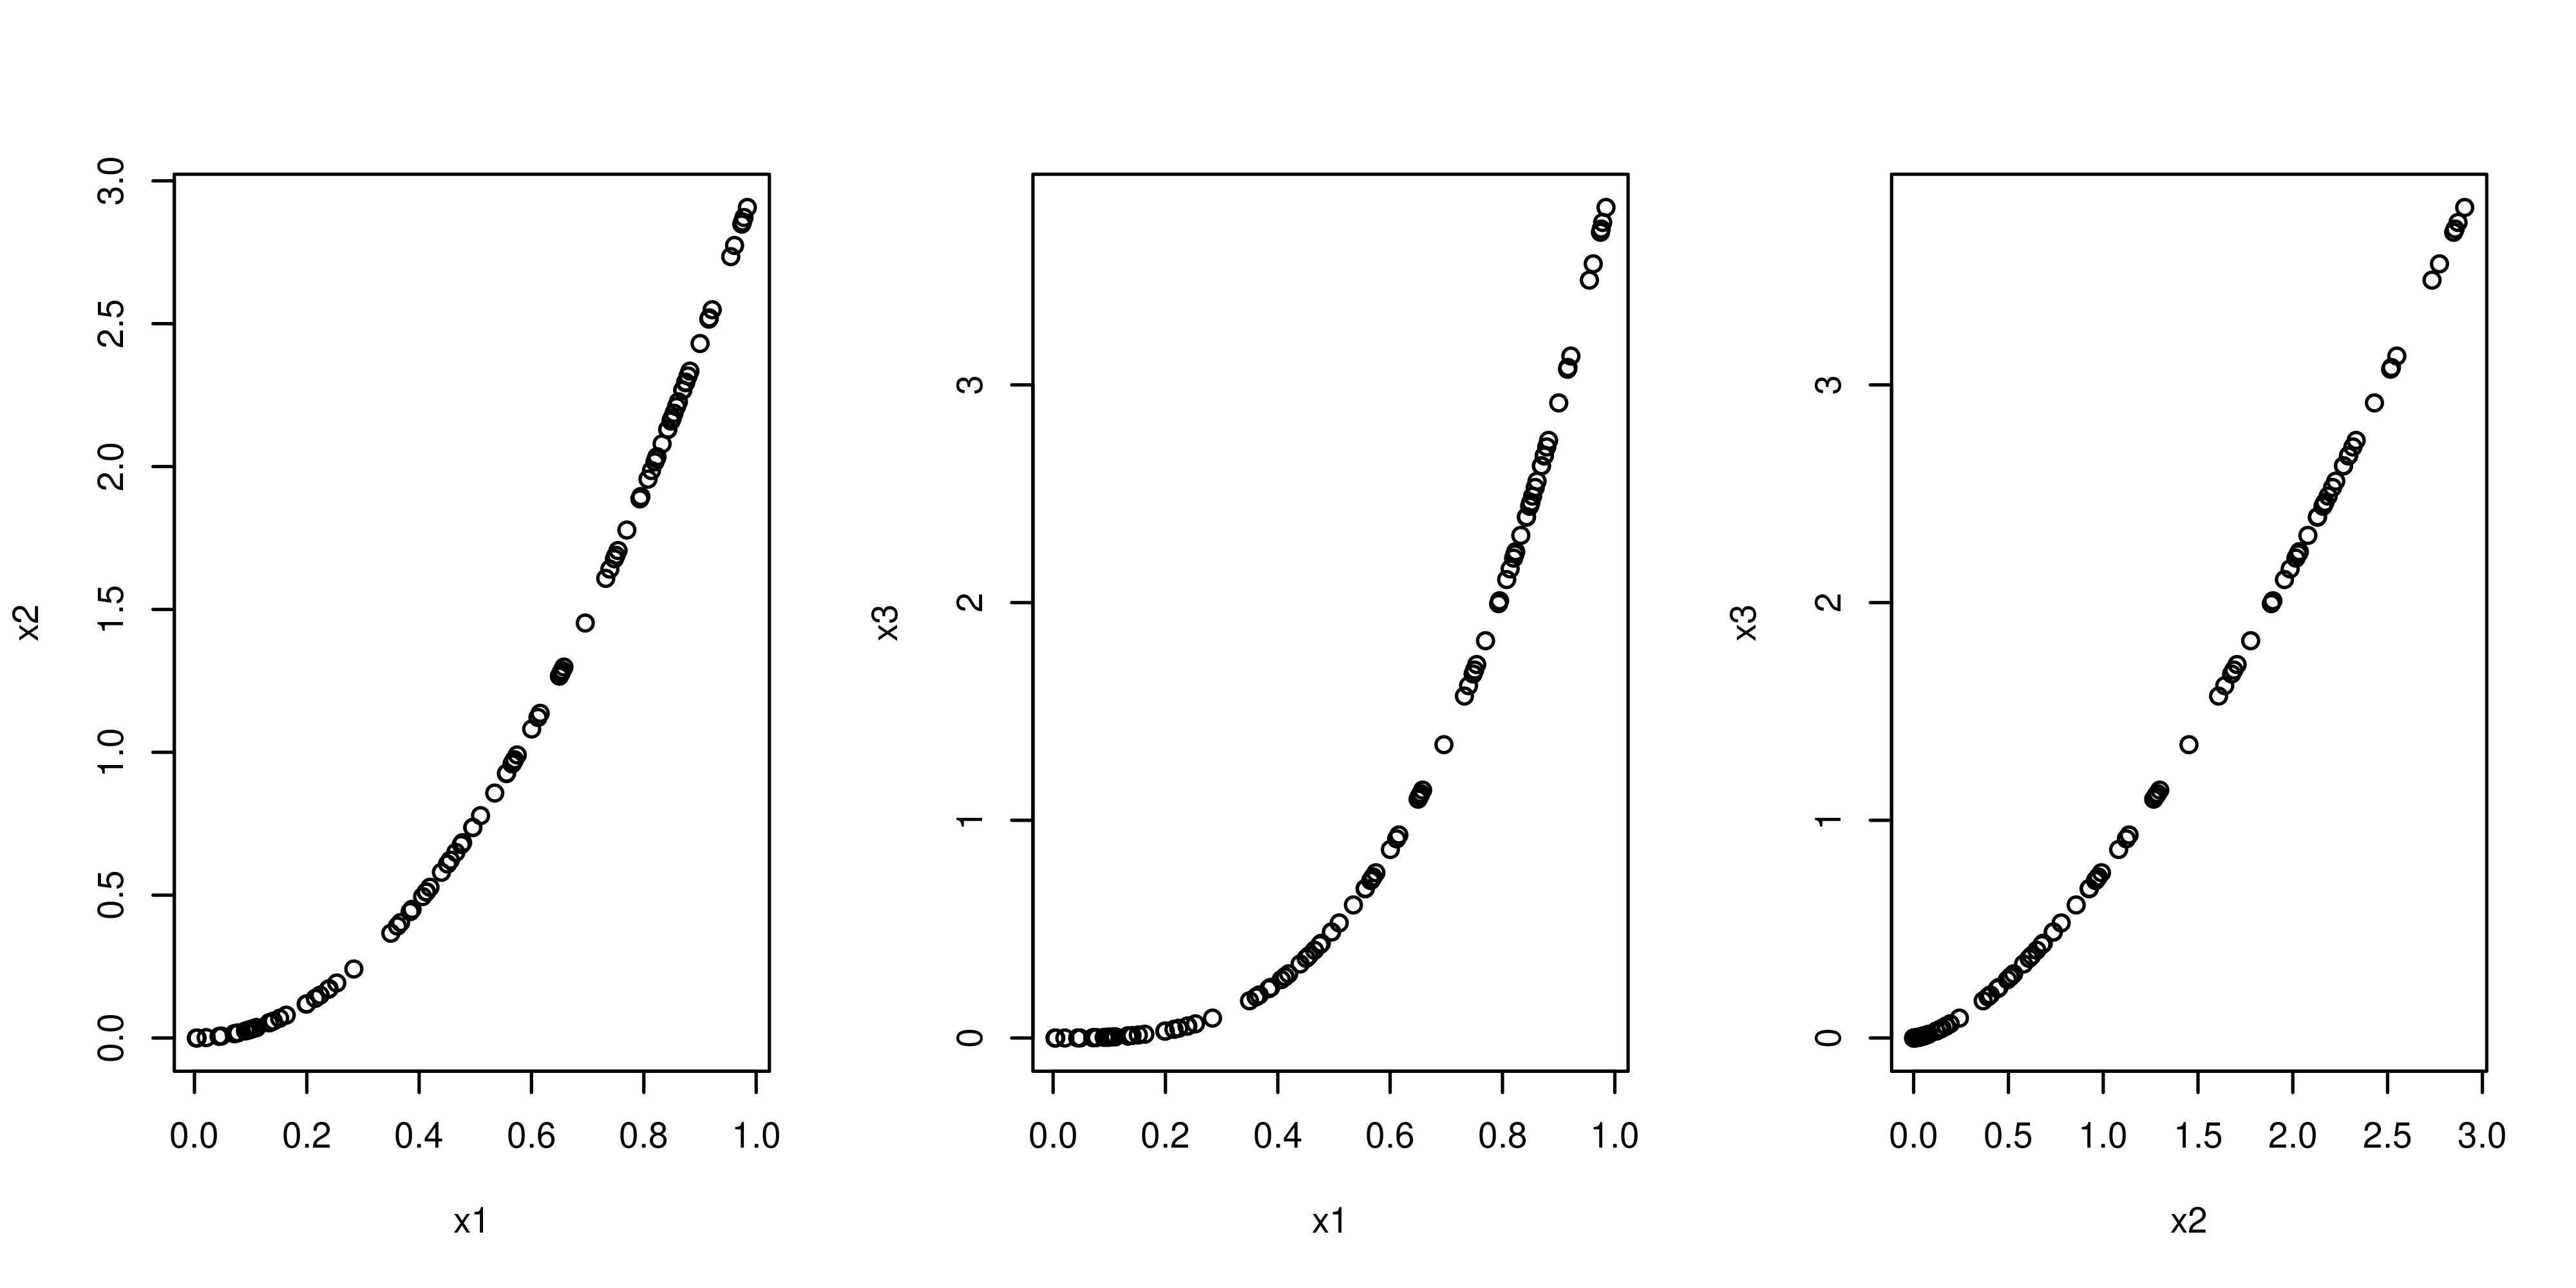

In [89]:
par(mfrow=c(1,3))
plot(x1,x2)
plot(x1,x3)
plot(x2,x3)

In [90]:
library(car)

In [93]:
vif(lm(y2~x1+x2))

x1       x2 
18.20888 18.20888

In [95]:
vif(lm(y2~x1+x2+x3))

x1       x2       x3 
128.6405 754.0099 293.0006

In [97]:
mean((y1-x1)^2)

[1] 29.09081

In [98]:
mean((y2 - x2 - x3)^2)

[1] 374.4617

In [99]:
c(mean(y1),mean(y2))
c(mean((y1-1)^2),mean((y2-3)^2))

[1]  4.869496 13.653365

[1]  17.08873 360.29008

---

## 시도 2

In [79]:
x1=runif(100)
x2 = x1*5
x3 = 4*x1^3
y1=3+3.5*x1+rnorm(100)
y2=3+1.5*x1+x2^2+x3^3+rnorm(100)

In [80]:
cor(x1,x2)
cor(x1,x3)

[1] 1

[1] 0.9146979

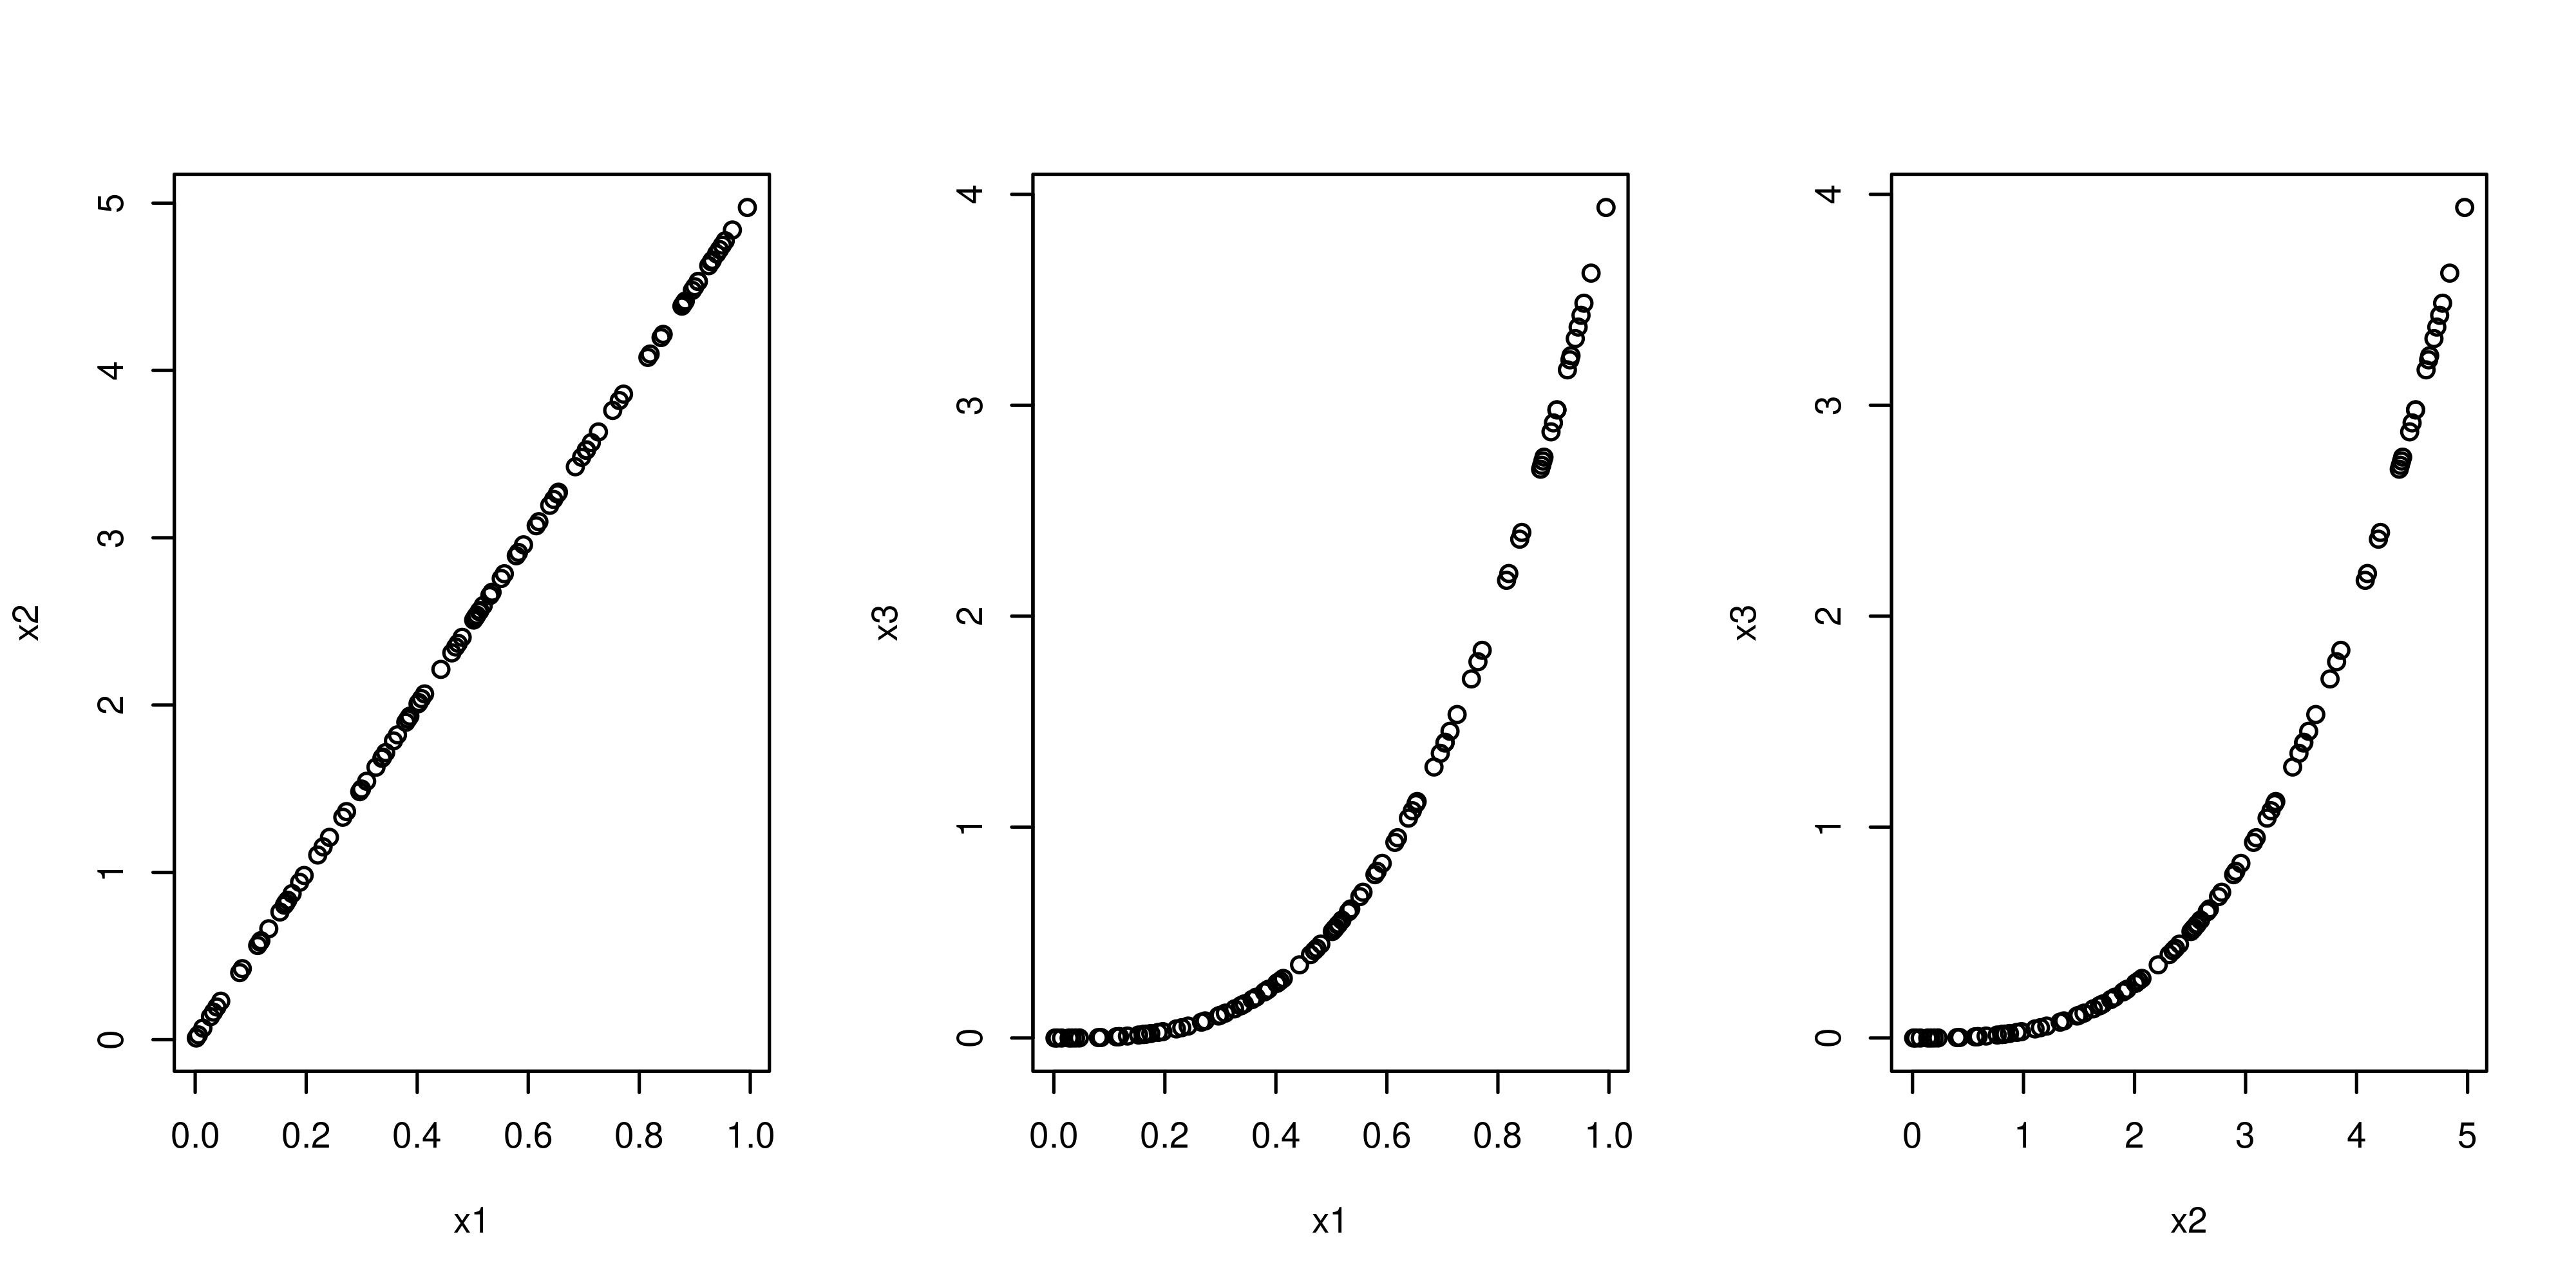

In [81]:
par(mfrow=c(1,3))
plot(x1,x2)
plot(x1,x3)
plot(x2,x3)

In [82]:
library(car)

In [83]:
summary(lm(y1~x1))


Call:
lm(formula = y1 ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3432 -0.6375 -0.1498  0.7948  2.7624 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.8880     0.2085  13.853  < 2e-16 ***
x1            3.5476     0.3648   9.724  4.8e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.048 on 98 degrees of freedom
Multiple R-squared:  0.4911,	Adjusted R-squared:  0.4859 
F-statistic: 94.56 on 1 and 98 DF,  p-value: 4.805e-16


In [84]:
summary(lm(y1~x1+x2))


Call:
lm(formula = y1 ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3432 -0.6375 -0.1498  0.7948  2.7624 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.8880     0.2085  13.853  < 2e-16 ***
x1            3.5476     0.3648   9.724  4.8e-16 ***
x2                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.048 on 98 degrees of freedom
Multiple R-squared:  0.4911,	Adjusted R-squared:  0.4859 
F-statistic: 94.56 on 1 and 98 DF,  p-value: 4.805e-16


In [85]:
vif(lm(y1~x1+x2))

ERROR: Error in vif.default(lm(y1 ~ x1 + x2)): there are aliased coefficients in the model


In [86]:
summary(lm(y1~x1+x2+x3))


Call:
lm(formula = y1 ~ x1 + x2 + x3)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4182 -0.5931 -0.1113  0.7597  2.6819 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.7591     0.2804   9.841 2.95e-16 ***
x1            4.1191     0.9051   4.551 1.55e-05 ***
x2                NA         NA      NA       NA    
x3           -0.1570     0.2275  -0.690    0.492    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.051 on 97 degrees of freedom
Multiple R-squared:  0.4936,	Adjusted R-squared:  0.4831 
F-statistic: 47.27 on 2 and 97 DF,  p-value: 4.676e-15


In [78]:
vif(lm(y1~x1+x2+x3))

x1        x2        x3 
 93.26756 532.83198 208.12438